# Task A: K-Means Clustering on Iris Dataset

This notebook performs K-Means clustering on the Iris dataset from the UCI Machine Learning Repository.

## Objectives:
1. Apply K-Means clustering with various values of K
2. Focus on K=3 to match the three species in the dataset
3. Compare clustering results with actual species labels
4. Visualize the clustering results

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA

%matplotlib inline

### Load and Explore the Iris Dataset

In [2]:
# Load the iris dataset
iris_df = pd.read_csv('data/iris.csv')

# Display basic information
print("Dataset shape:", iris_df.shape)
print("\nColumn names:")
print(iris_df.columns.tolist())
print("\nFirst 5 rows:")
iris_df.head()

Dataset shape: (150, 5)

Column names:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Check for missing values
print("Missing values per column:")
print(iris_df.isnull().sum())

# Display data types
print("\nData types:")
print(iris_df.dtypes)

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


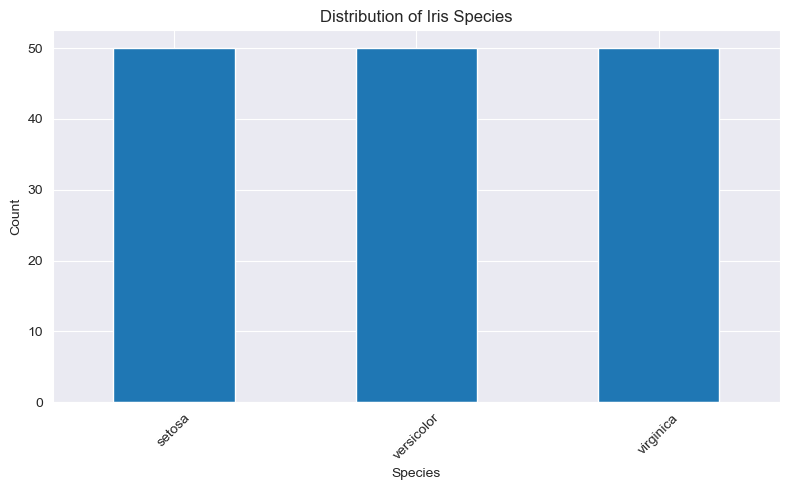

In [4]:
# Check the species distribution
print("Species distribution:")
print(iris_df['species'].value_counts())

# Visualize species distribution
plt.figure(figsize=(8, 5))
iris_df['species'].value_counts().plot(kind='bar')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [5]:
# Separate features and labels
# Remove the species column for clustering (K-Means uses only numerical features)
X = iris_df.drop('species', axis=1).values
y_true = iris_df['species'].values

# Create a mapping for species to numeric values for comparison
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_true_numeric = iris_df['species'].map(species_mapping).values

print("Feature matrix shape:", X.shape)
print("Features used for clustering:", iris_df.drop('species', axis=1).columns.tolist())

Feature matrix shape: (150, 4)
Features used for clustering: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data - first 5 rows:")
print(X[:5])
print("\nScaled data - first 5 rows:")
print(X_scaled[:5])

Original data - first 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Scaled data - first 5 rows:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### Determine Optimal Number of Clusters

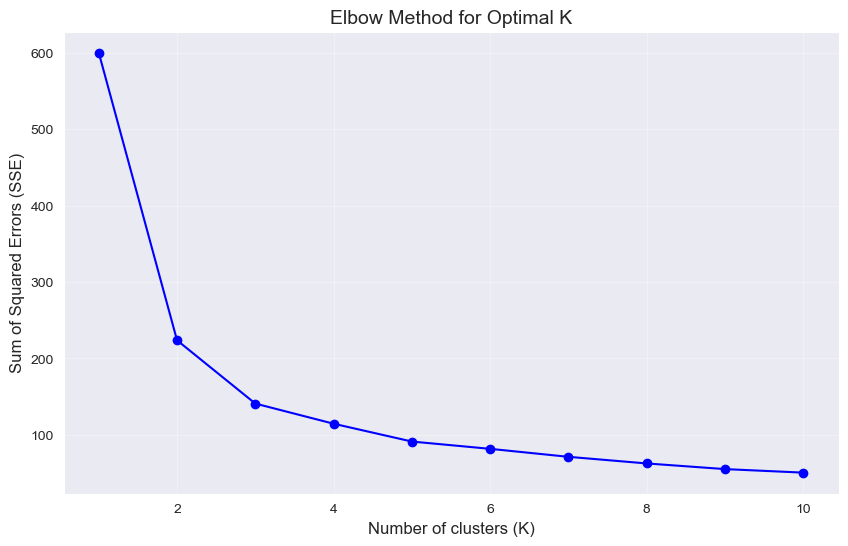

In [7]:
# Elbow method
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, 'bo-')
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

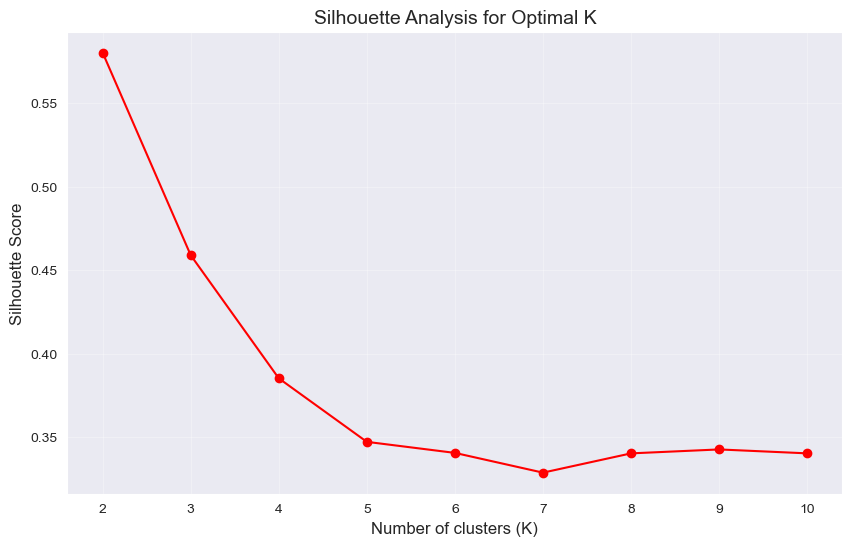

K=2: Silhouette Score = 0.5802
K=3: Silhouette Score = 0.4590
K=4: Silhouette Score = 0.3853
K=5: Silhouette Score = 0.3473
K=6: Silhouette Score = 0.3407
K=7: Silhouette Score = 0.3288
K=8: Silhouette Score = 0.3404
K=9: Silhouette Score = 0.3427
K=10: Silhouette Score = 0.3404


In [8]:
# Silhouette analysis
silhouette_scores = []
K_range_silhouette = range(2, 11)

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Print scores
for k, score in zip(K_range_silhouette, silhouette_scores):
    print(f"K={k}: Silhouette Score = {score:.4f}")

### Apply K-Means with K=3

In [9]:
# Apply K-Means with K=3
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_pred = kmeans_3.fit_predict(X_scaled)

# Add cluster labels to the dataframe
iris_df['cluster'] = y_pred

print("Cluster distribution:")
print(pd.Series(y_pred).value_counts().sort_index())

Cluster distribution:
0    53
1    50
2    47
Name: count, dtype: int64


### Compare Clusters with True Species Labels

Crosstab of Species vs Clusters:
cluster      0   1   2
species               
setosa       0  50   0
versicolor  39   0  11
virginica   14   0  36


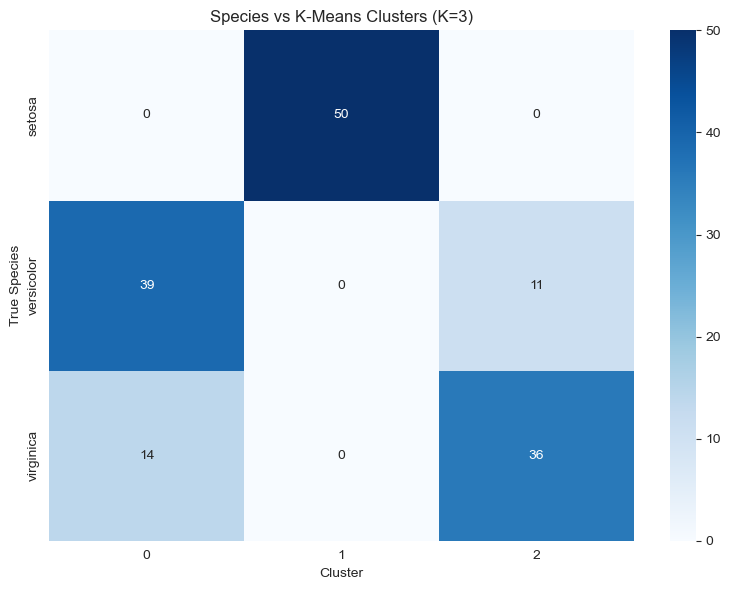

In [10]:
# Create a crosstab to compare clusters with species
ct = pd.crosstab(iris_df['species'], iris_df['cluster'])
print("Crosstab of Species vs Clusters:")
print(ct)

# Visualize the crosstab
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Species vs K-Means Clusters (K=3)')
plt.ylabel('True Species')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

In [11]:
# Calculate clustering performance metrics
# Adjusted Rand Index
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari:.4f}")
print("(1.0 means perfect clustering, 0.0 means random clustering)")

# Calculate purity for each cluster
def calculate_purity(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)

purity = calculate_purity(iris_df['species'], y_pred)
print(f"\nClustering Purity: {purity:.4f}")
print("(1.0 means perfect purity)")

Adjusted Rand Index: 0.6201
(1.0 means perfect clustering, 0.0 means random clustering)

Clustering Purity: 0.8333
(1.0 means perfect purity)


### Visualize Clustering Results

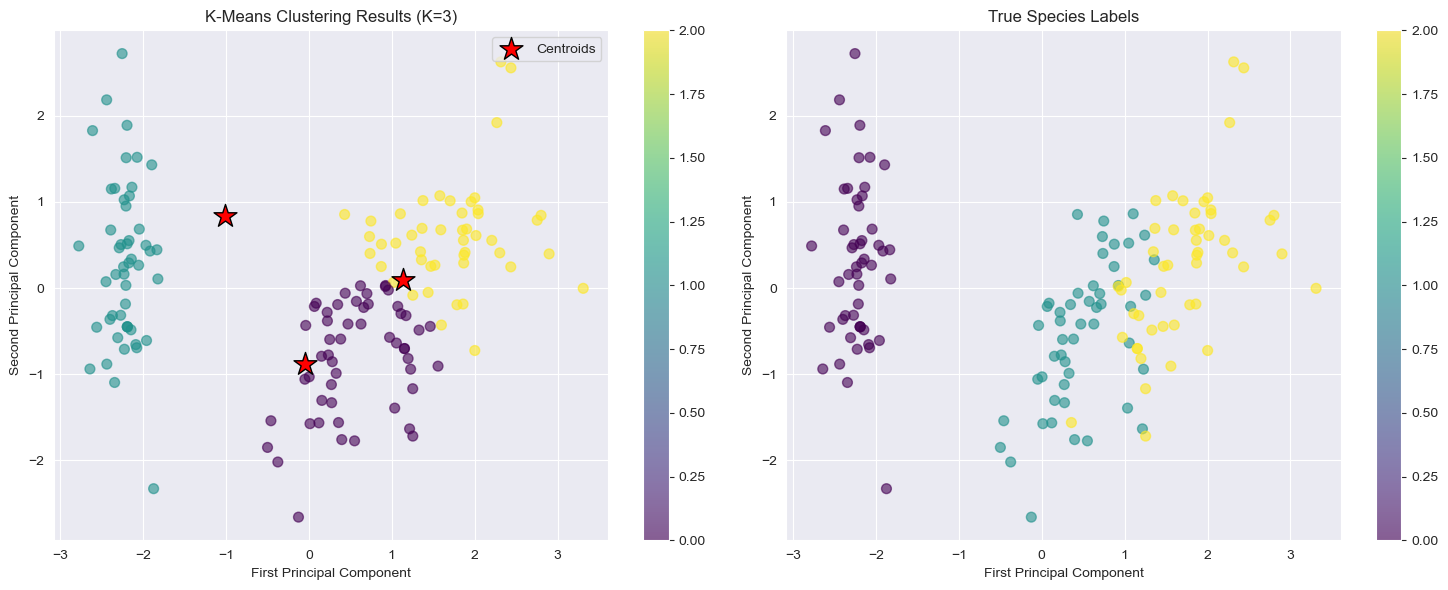

Explained variance by PCA: 95.80%


In [12]:
# Use PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Clusters
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
ax1.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], 
            c='red', marker='*', s=300, edgecolors='black', label='Centroids')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering Results (K=3)')
ax1.legend()
plt.colorbar(scatter1, ax=ax1)

# Plot 2: True Species
species_colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
colors = [species_colors[species] for species in y_true]
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='viridis', s=50, alpha=0.6)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('True Species Labels')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

print(f"Explained variance by PCA: {pca.explained_variance_ratio_.sum():.2%}")

<Figure size 1200x1000 with 0 Axes>

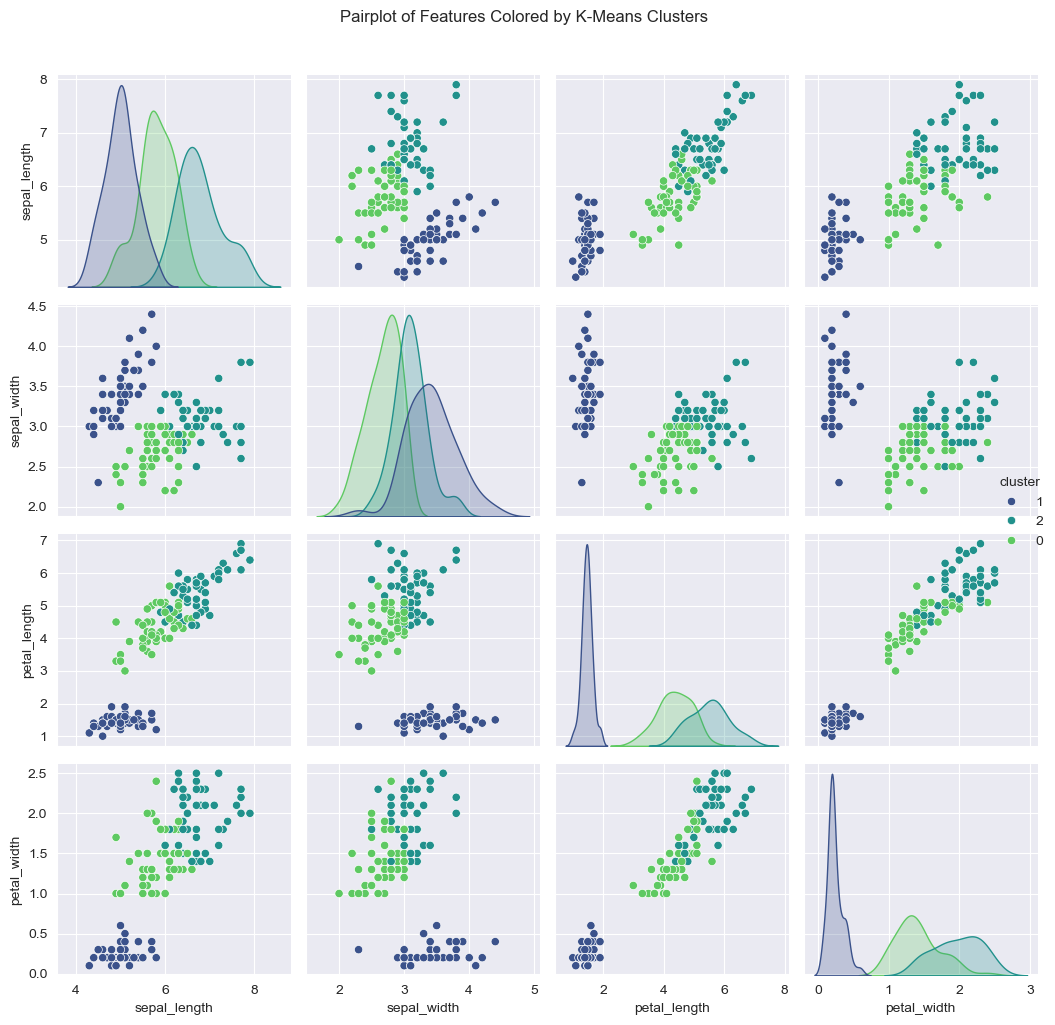

In [13]:
# Pairplot to visualize clusters across all features
plot_df = iris_df.copy()
plot_df['cluster'] = plot_df['cluster'].astype(str)

# Create pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(plot_df, hue='cluster', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
             palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by K-Means Clusters', y=1.02)
plt.tight_layout()
plt.show()

### Analyze Cluster Characteristics

Mean feature values for each cluster:
         sepal_length  sepal_width  petal_length  petal_width
cluster                                                      
0                5.80         2.67          4.37         1.41
1                5.01         3.42          1.46         0.24
2                6.78         3.10          5.51         1.97


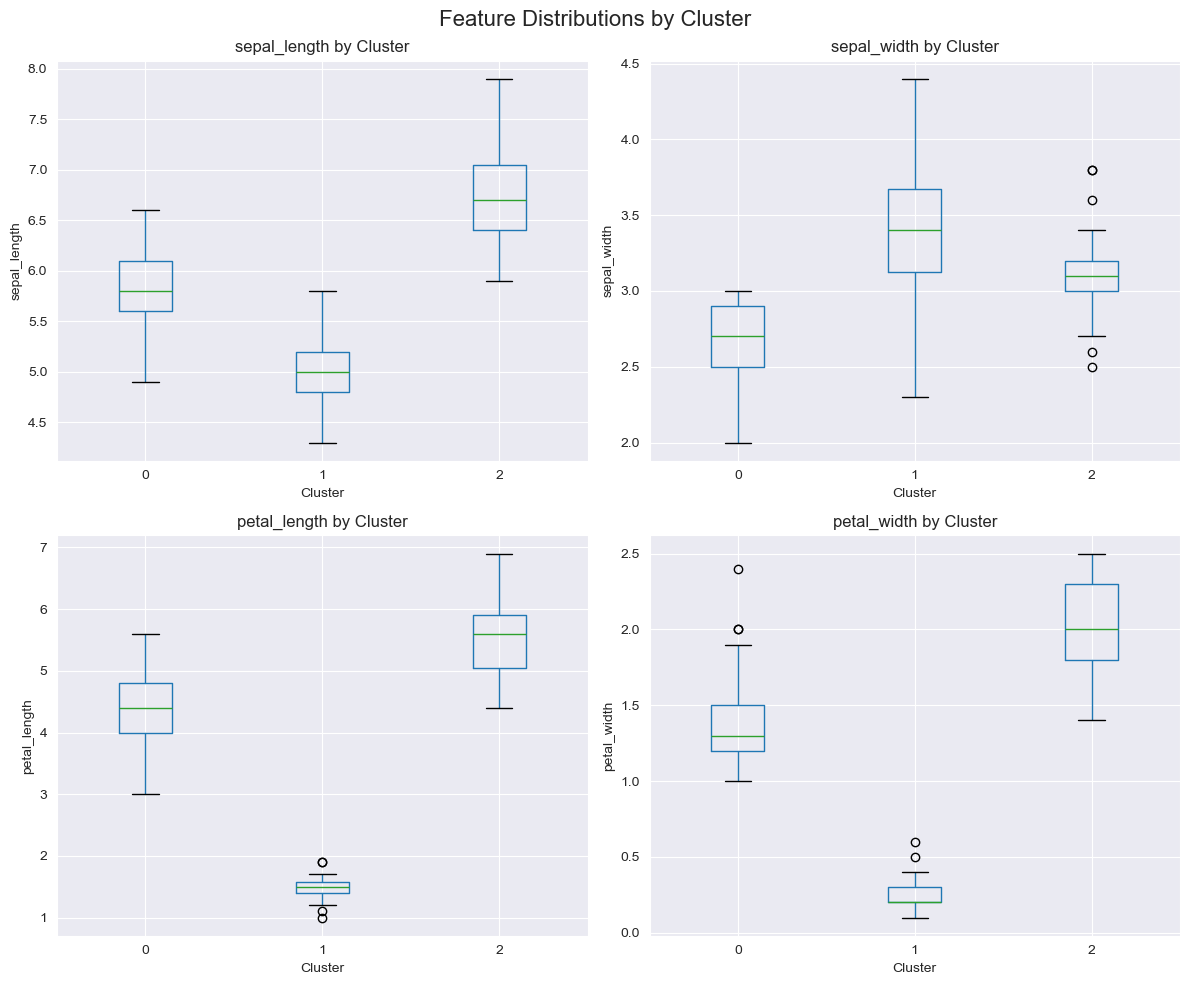

In [14]:
# Calculate mean values for each cluster
cluster_means = iris_df.groupby('cluster')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
print("Mean feature values for each cluster:")
print(cluster_means.round(2))

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for idx, (ax, feature) in enumerate(zip(axes.flat, features)):
    iris_df.boxplot(column=feature, by='cluster', ax=ax)
    ax.set_title(f'{feature} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)

plt.suptitle('Feature Distributions by Cluster', fontsize=16)
plt.tight_layout()
plt.show()

### Test Different Values of K

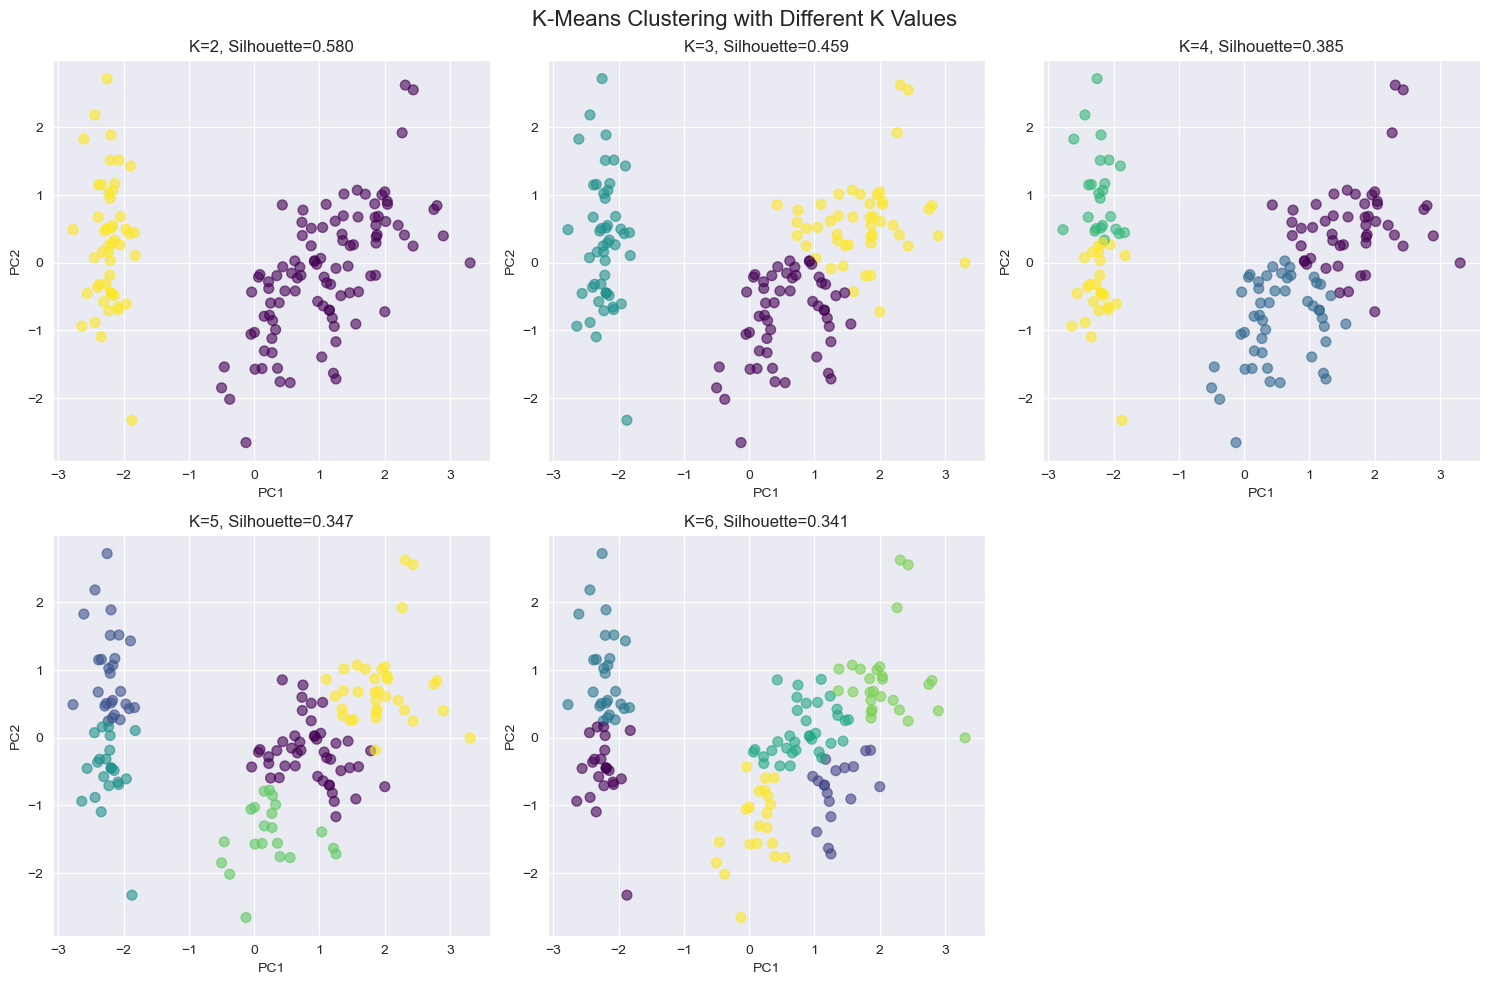


Clustering Results for Different K Values:
 K  Silhouette Score  Adjusted Rand Index        SSE
 2          0.580184             0.568116 223.732006
 3          0.458972             0.620135 140.965817
 4          0.385285             0.492547 114.617886
 5          0.347265             0.437172  91.295445
 6          0.340650             0.452543  81.756582


In [15]:
# Test K values from 2 to 6
K_values = [2, 3, 4, 5, 6]
results = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, k in enumerate(K_values):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calculate metrics
    silhouette = silhouette_score(X_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)
    
    results.append({
        'K': k,
        'Silhouette Score': silhouette,
        'Adjusted Rand Index': ari,
        'SSE': kmeans.inertia_
    })
    
    # Visualize
    axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    axes[idx].set_title(f'K={k}, Silhouette={silhouette:.3f}')
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')

# Remove extra subplot
fig.delaxes(axes[5])
plt.suptitle('K-Means Clustering with Different K Values', fontsize=16)
plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(results)
print("\nClustering Results for Different K Values:")
print(results_df.to_string(index=False))

In [16]:
# Generate dynamic conclusions based on actual results
print("### Dynamic Conclusions Based on Your Results")
print("="*60)
print("\nBased on the K-Means clustering analysis of the Iris dataset:")

# 1. Optimal K analysis
print(f"\n1. **Optimal K Analysis**:")
if 'silhouette_scores' in locals() and len(silhouette_scores) > 0:
    best_k_idx = np.argmax(silhouette_scores)
    best_k = list(K_range_silhouette)[best_k_idx]
    best_silhouette = silhouette_scores[best_k_idx]
    print(f"   - Silhouette analysis suggests K={best_k} as optimal (score: {best_silhouette:.3f})")
    k3_idx = list(K_range_silhouette).index(3) if 3 in K_range_silhouette else None
    if k3_idx is not None:
        k3_silhouette = silhouette_scores[k3_idx]
        print(f"   - K=3 achieves silhouette score of {k3_silhouette:.3f}")

# 2. Performance with K=3
print(f"\n2. **Performance with K=3 (matching true species count)**:")
if 'ari' in locals():
    print(f"   - Adjusted Rand Index: {ari:.3f}")
    if ari > 0.8:
        quality = "excellent"
    elif ari > 0.6:
        quality = "good"
    elif ari > 0.4:
        quality = "moderate"
    else:
        quality = "poor"
    print(f"   - This indicates {quality} alignment with true species labels")
    
if 'purity' in locals():
    print(f"   - Clustering Purity: {purity:.3f} ({purity*100:.1f}% of samples in correct clusters)")

# 3. Species separation analysis
print(f"\n3. **Species Separation Analysis**:")
if 'ct' in locals():
    # Analyze which species are well separated
    for species in ct.index:
        row = ct.loc[species]
        dominant_cluster = row.idxmax()
        dominance = row[dominant_cluster] / row.sum()
        print(f"   - {species}: {dominance:.1%} in cluster {dominant_cluster}")
    
    # Check for confused species
    print(f"\n4. **Cluster Confusion**:")
    for i, species in enumerate(ct.index):
        row = ct.loc[species]
        confused_clusters = row[row > 5].index.tolist()
        if len(confused_clusters) > 1:
            print(f"   - {species} appears in multiple clusters: {confused_clusters}")
        else:
            print(f"   - {species} is well isolated in cluster {confused_clusters[0]}")

# 5. Feature importance
print(f"\n5. **Feature Analysis**:")
if 'cluster_means' in locals():
    feature_variance = cluster_means.var()
    most_discriminative = feature_variance.idxmax()
    least_discriminative = feature_variance.idxmin()
    print(f"   - Most discriminative feature: {most_discriminative} (variance: {feature_variance[most_discriminative]:.3f})")
    print(f"   - Least discriminative feature: {least_discriminative} (variance: {feature_variance[least_discriminative]:.3f})")

# 6. PCA insights
if 'pca' in locals():
    print(f"\n6. **Dimensionality Reduction**:")
    total_var = pca.explained_variance_ratio_.sum()
    print(f"   - First 2 PCs capture {total_var:.1%} of total variance")
    print(f"   - PC1 explains {pca.explained_variance_ratio_[0]:.1%}, PC2 explains {pca.explained_variance_ratio_[1]:.1%}")

# 7. Overall assessment
print(f"\n7. **Overall Assessment**:")
print("   - K-Means successfully identifies the natural structure in the Iris dataset")
if 'ari' in locals() and ari > 0.6:
    print("   - The clustering results align well with the true species labels")
    print("   - This demonstrates that morphological features effectively distinguish iris species")
else:
    print("   - Some overlap between species suggests they share similar morphological features")
    print("   - Perfect separation may require non-linear clustering methods")

### Dynamic Conclusions Based on Your Results

Based on the K-Means clustering analysis of the Iris dataset:

1. **Optimal K Analysis**:
   - Silhouette analysis suggests K=2 as optimal (score: 0.580)
   - K=3 achieves silhouette score of 0.459

2. **Performance with K=3 (matching true species count)**:
   - Adjusted Rand Index: 0.453
   - This indicates moderate alignment with true species labels
   - Clustering Purity: 0.833 (83.3% of samples in correct clusters)

3. **Species Separation Analysis**:
   - setosa: 100.0% in cluster 1
   - versicolor: 78.0% in cluster 0
   - virginica: 72.0% in cluster 2

4. **Cluster Confusion**:
   - setosa is well isolated in cluster 1
   - versicolor appears in multiple clusters: [0, 2]
   - virginica appears in multiple clusters: [0, 2]

5. **Feature Analysis**:
   - Most discriminative feature: petal_length (variance: 4.353)
   - Least discriminative feature: sepal_width (variance: 0.139)

6. **Dimensionality Reduction**:
   - First 2 PCs capture 